<center><h1> 1. Optimization of a function with real parameters.<br>
Consider the Eggholder’s function
</h1></center>



In [0]:
import math
import random
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Task 1. (Hill Climbing Search) (20 pts)
> Implement a Hill Climbing (descending) algorithm to find the global minimum of the Eggholder’s function. Adopt a maximum step size of 1.0. A new position (x’, y’) can be generated from old position (x, y) by x’ = (rand() – 0.5)*0.1 + x and y’ = (rand() – 0.5)*1.0 + y, where rand() is a uniform random number generation function generating random numbers in [0, 1).

> Randomly generate an initial position. Use the Hill Climbing algorithm to optimize the Eggholder’s function starting from the initial position. Terminate the optimization process when a better position yielding lower objective function value is not found in the last 100 steps. Repeat this process for 100 runs. Display the distribution of the minima you found in each run on a figure.


Cost for  (6.000000, 0.000000) after -> iteration 0 = 32.598571
Cost for  (6.022103, -0.031669) after -> iteration 1 = 32.550258
Cost for  (6.054071, -0.058317) after -> iteration 2 = 32.530244
[32.59857125742533, 32.550258346175, 32.5302444505238, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.59051536203859, 32.5905153

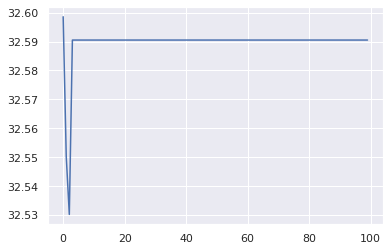

CPU times: user 330 ms, sys: 12.5 ms, total: 343 ms
Wall time: 341 ms


In [2]:
%%time

def eggholder(x,y):
    """
    input x, y
    return egghold funtion
    """
    return (y+47)*math.sin(math.sqrt(abs(x/2+(y+47))))- x*math.sin(math.sqrt(abs(x-(y+47))))

def random_xy():
    """
    return two random float number 
    in range (-10000, 10000)
    for inital points.
    """
    x = np.random.randint(10)
    y = np.random.randint(10)
    return x, y

def climb(x=0,y=0):
  cost = eggholder(x,y)
  dx = (random.uniform(0, 1) - 0.5)*0.1 + x
  dy = (random.uniform(0, 1) - 0.5)*0.1 + y
  grads={
      "dx":dx,
      "dy":dy
  }
  return cost,grads

def hill_climb_search(x,y):
  ''' Implementing Hill climbing Algorithm '''
  minima=[]
  globalMinima=1000
  for i in range(100):
    cost,grads=climb(x,y)
    minima.append(cost)
    if cost < globalMinima:
      if True:
        print("Cost for  (%f, %f) after -> iteration %i = %f" %(x, y, i, cost))
        globalMinima,minimax,minimay =cost,x,y
        x,y = grads["dx"],grads["dy"]
        globalPos,pos={"global Minima" : globalMinima,"global X": minimax,"global Y":minimay},{"x":x,"y":y}
  return minima,pos,globalPos

x,y = random_xy()
minima,pos,global_Pos=hill_climb_search(x,y)
print(minima)
print('X: ',x,'Y : ',y)
print('updated X,Y positions are : ',pos["x"],pos["y"])
print('Global minima : %f, for values (%f,%f)'%(global_Pos["global Minima"],global_Pos["global X"],global_Pos["global Y"]))
# Ploting the graph
X = [i for i in range(100)]
sns.set(color_codes=True)
plt.plot(minima)
plt.show()

## Task 2. (Differential Evolution)	(20 pts)
> Implement a Differential Evolution algorithm to find the global minimum of the Eggholder’s function. Terminate the optimization process when a better position yielding lower objective function value is not found in the last 100 steps. Repeat this process for 100 runs. Display the distribution of the minima you found in each run on a figure.


Minimum Cost after 100 iterations :  [-25.93935075084773, -25.93935075084773, -25.93935075084773, -25.93935075084773, -25.93935075084773, -25.93935075084773, -39.638143109932855, -39.638143109932855, -39.638143109932855, -47.775768599806206, -47.775768599806206, -47.775768599806206, -55.654326677841595, -55.654326677841595, -59.29699470022798, -59.29699470022798, -62.53906202760423, -62.53906202760423, -62.53906202760423, -64.71609072776596, -64.71609072776596, -64.71609072776596, -64.71609072776596, -64.71609072776596, -67.19160159113653, -67.19160159113653, -67.19160159113653, -67.19160159113653, -68.02542363579346, -68.02542363579346, -68.02542363579346, -68.91596178959283, -68.91596178959283, -68.91596178959283, -68.91596178959283, -68.91596178959283, -68.91596178959283, -69.09215817963768, -69.60913822697019, -69.60913822697019, -71.40074366047973, -71.40074366047973, -71.79608079297078, -71.79608079297078, -71.79608079297078, -71.99791241567898, -71.99791241567898, -71.9979124156

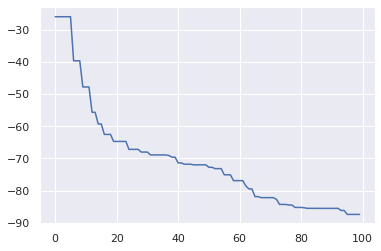

CPU times: user 360 ms, sys: 5.15 ms, total: 365 ms
Wall time: 365 ms


In [3]:
%%time
def definePopulation(p,bounds):
  ''' Define the population. '''
  pop = []
  for i in range(0,p):
        single = []
        for j in range(len(bounds)):
            single.append(random.uniform(bounds[j][0],bounds[j][1]))
        pop.append(single)
  return pop 

def eggholder(x):
  return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))-x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

def recomb(posVector, MutantVector, cr):
  ''' recombination occurs when crossover is less than or equal to recombination rate 
     else recombination don't occur. '''
  rcVector = []
  crossover = random.random()
  for i in range(0,len(posVector)):
    if crossover <= cr:
      rcVector.append(MutantVector[i])
    else:
      rcVector.append(posVector[i])
  return rcVector

def differential_evolution():
    ''' use differential evolution to find global min  '''
    costPerGeneration={}
    bounds =[(-1,1),(-1,1)]
    p=10
    f=0.8
    nc=1000
    #cr=random.random()
    cr=0.7
    #pool=[]
    pool = definePopulation(p,bounds)
    #for a in range(100):
        #pool.append(random_xy())
    #print('begin:',pool)
    for k in range(100):
        pool_copy=pool
        for i in range(p):
            candidates=list(range(0,p))
            candidates.remove(i)
            #try:
            randomIndex = random.sample(candidates, 3)
            #except:
            # print("Error")
            # xi,yi=pool_copy[i]
            # r0,r1,r2=random.sample(range(20), 3)
            # r0,r1,r2 not equal to the curent loop index i
            #  r0==i or r1==i or r2==i:
            #  r0,r1,r2=random.sample(range(20), 3)
            xr0=pool_copy[randomIndex[0]]
            xr1=pool_copy[randomIndex[1]]
            xr2=pool_copy[randomIndex[2]]
            #v1=[]
            v1 = np.add(xr0,(f*np.subtract(xr1,xr2)))
            # v2 = np.add(yr0,(f*np.subtract(yr1,yr2)))
            # while True:
            #     v1=xr0+f*(xr1-xr2)
            #     v2=yr0+f*(yr1-yr2)
            posVector=pool_copy[i]
            recombVector=recomb(posVector,v1,cr)
            fitnessPos = eggholder(posVector)
            fitnessRecomb =eggholder(recombVector)
            if fitnessRecomb < fitnessPos:
              pool[i] = recombVector
              costPerGeneration[k] = fitnessRecomb
            else:
              costPerGeneration[k] = fitnessPos
    # Obtain optimal score of the vectors
    costsOnly = list(costPerGeneration.values())
    #minima = min(costsOnly)
    print("Minimum Cost after 100 iterations : ",costsOnly)
    #return minCost,generationCosts
    return costsOnly,costPerGeneration



minima , cost = differential_evolution()

print("The Global minima is : ",min(minima))
# Ploting the Graph
sns.set(color_codes=True)   
plt.plot(minima)
plt.show()

## Task 3. (Analysis) (10 pts)
> Compare the results and computational time you obtain in the last two tasks. Draw your conclusions.

> Implementing hill climbing algorithm to find minimum of egg holder function.
  - The algorithm will find a minimum but it will not be a global minima rathe a local minima, will have to increase the number of iterations to find next best minimum

> Implementing a differential evolution solution to find the global minimum of the egg holder function.
  - It is a effective way to find the global minimum, as it finds minimum value better than hill climbing.

> **Time taken** to find the global minima in case of the hill climbing is **more** as compared to the differntial evolution because hill climbing usually get stuck at the local minima.

<center><h1>2. N-queens Problem</h1></center>

In [0]:
import numpy as np
import random 
import time

In [0]:
def random_place(size):
    """
    randomly placed queens
    """
    board= []
    for i in range(size):
        board.append(random.randint(0,size-1))

    return board

## Task 1. (Hill Climbing Search) (25 pts)
> Implement a Hill Climbing Search algorithm to find a solution of the N-queens problem from a random given position. Use the number of pairwise attacks as the objective function.  Repeat the program 100 times for N = 8, N = 16, and N = 32 and show how many times you can find the solutions. Plot the initial state and the final state (not necessary the solution) of the first 10 times.


In [0]:
def get_h_score(board):
    h = 0
    for i in range(len(board)):
    #Check every column we haven't already checked
        for j in range(i + 1,len(board)):
          #Queens are in the same row
          if board[i] == board[j]:
            h += 1
      #Get the difference between the current column
      #and the check column
          offset = j - i
      #To be a diagonal, the check column value has to be 
      #equal to the current column value +/- the offset
          if board[i] == board[j] - offset or board[i] == board[j] + offset:
            h += 1
     
    return h

def hill_climbing_search(board):
    global counter
    moves = {}
    for col in range(len(board)):
        best_move = board[col]
        for row in range(len(board)):
            if board[col] == row:
            #We don't need to evaluate the current
            #position, we already know the h-value
                continue

            board_copy = list(board)
          #Move the queen to the new row
            board_copy[col] = row
            moves[(col,row)] = get_h_score(board_copy)
            if get_h_score(board_copy)==0:
                counter=counter+1
                #print('find solution: ')
                return board_copy
        best_moves = []
        h_to_beat = get_h_score(board)
        for k,v in moves.items():
            if v < h_to_beat:
                h_to_beat = v

        for k,v in moves.items():
            if v == h_to_beat:
                best_moves.append(k)

        #Pick a random best move
        if len(best_moves) > 0:
            pick = random.randint(0,len(best_moves) - 1)
            col = best_moves[pick][0]
            row = best_moves[pick][1]
            board[col] = row
    #print('final state: ')
    return board

<center><h2>8 Queens</h2><center>

In [7]:
counter=0
for i in range(10):
    board=random_place(8)
    print('initial state')
    print(board)
    hill_climbing_search(board)
    print(board)
for i in range(90):
    board=random_place(8)
    hill_climbing_search(board)    
#print("we can find solution for ",counter)

initial state
[5, 4, 1, 2, 4, 4, 6, 2]
[7, 5, 0, 1, 1, 4, 6, 3]
initial state
[7, 4, 6, 6, 6, 6, 3, 3]
[0, 1, 4, 2, 7, 6, 1, 5]
initial state
[4, 2, 7, 3, 4, 6, 3, 5]
[2, 0, 1, 7, 4, 6, 3, 5]
initial state
[2, 1, 7, 4, 2, 1, 1, 3]
[3, 0, 6, 4, 7, 5, 0, 2]
initial state
[6, 5, 7, 6, 6, 3, 3, 6]
[0, 2, 4, 1, 7, 0, 3, 6]
initial state
[0, 2, 5, 4, 7, 6, 4, 6]
[0, 3, 7, 5, 1, 6, 4, 6]
initial state
[3, 6, 3, 1, 6, 0, 4, 2]
[7, 5, 1, 3, 0, 6, 4, 2]
initial state
[7, 3, 7, 4, 2, 7, 1, 5]
[0, 3, 6, 0, 7, 4, 1, 5]
initial state
[2, 6, 7, 6, 1, 4, 5, 5]
[0, 3, 6, 7, 1, 1, 5, 5]
initial state
[3, 7, 4, 7, 6, 7, 2, 0]
[5, 1, 1, 4, 6, 3, 0, 2]


<center><h2>16 Queens</h2><center>

In [8]:
counter=0
for i in range(10):
    board=random_place(16)
    print('initial state')
    print(board)
    hill_climbing_search(board)
    print(board)
for i in range(90):
    board=random_place(16)
    hill_climbing_search(board)
    
print("we can find solution for ",counter)

initial state
[11, 3, 7, 6, 12, 2, 9, 10, 6, 2, 4, 11, 11, 10, 11, 6]
[13, 3, 8, 15, 12, 14, 1, 10, 0, 2, 4, 9, 12, 9, 11, 6]
initial state
[14, 3, 12, 3, 3, 5, 2, 1, 14, 3, 11, 9, 3, 5, 10, 7]
[13, 8, 12, 0, 15, 0, 6, 10, 14, 2, 11, 9, 3, 5, 2, 9]
initial state
[10, 5, 2, 2, 5, 3, 3, 6, 11, 0, 5, 12, 12, 8, 3, 13]
[14, 9, 4, 15, 1, 15, 10, 6, 11, 0, 2, 5, 12, 8, 3, 13]
initial state
[14, 10, 12, 9, 9, 7, 6, 3, 8, 6, 3, 15, 14, 4, 7, 2]
[1, 10, 12, 1, 9, 13, 0, 5, 11, 6, 10, 11, 14, 15, 7, 2]
initial state
[7, 12, 10, 3, 1, 8, 5, 9, 7, 14, 2, 1, 11, 5, 4, 12]
[14, 8, 15, 3, 0, 3, 1, 9, 7, 10, 14, 2, 11, 7, 4, 12]
initial state
[0, 7, 15, 13, 5, 6, 8, 6, 6, 11, 2, 2, 0, 1, 15, 13]
[4, 9, 7, 3, 14, 12, 9, 0, 5, 11, 6, 10, 2, 1, 15, 13]
initial state
[14, 14, 13, 4, 15, 5, 9, 12, 0, 13, 14, 7, 11, 9, 4, 1]
[6, 3, 10, 10, 15, 5, 9, 2, 0, 12, 14, 8, 11, 7, 4, 1]
initial state
[11, 4, 2, 12, 6, 0, 8, 7, 12, 4, 0, 9, 5, 2, 12, 2]
[1, 15, 10, 3, 14, 14, 13, 4, 13, 15, 0, 11, 8, 5, 12, 2]
initi

<center><h2>32 Queens</h2><center>

In [9]:
counter=0
for i in range(10):
    board=random_place(32)
    print('initial state')
    print(board)
    hill_climbing_search(board)
    print(board)
for i in range(90):
    board=random_place(32)
    hill_climbing_search(board)
    
print("we can find solution for ",counter,' times')

initial state
[1, 0, 8, 29, 20, 14, 8, 6, 23, 26, 4, 3, 9, 30, 5, 4, 13, 27, 15, 26, 28, 25, 30, 15, 27, 28, 29, 27, 16, 2, 0, 21]
[12, 24, 7, 31, 18, 1, 22, 20, 10, 8, 5, 3, 23, 19, 29, 4, 9, 11, 15, 17, 6, 25, 1, 14, 0, 26, 13, 30, 16, 2, 15, 21]
initial state
[22, 19, 25, 9, 14, 26, 21, 30, 14, 13, 21, 7, 29, 31, 14, 0, 5, 13, 5, 12, 23, 17, 23, 12, 4, 3, 12, 26, 17, 11, 0, 29]
[16, 6, 22, 10, 28, 15, 8, 30, 2, 18, 1, 25, 27, 31, 20, 7, 13, 30, 5, 14, 1, 21, 19, 2, 28, 3, 9, 4, 17, 11, 0, 29]
initial state
[29, 13, 5, 3, 10, 28, 27, 22, 25, 10, 2, 0, 18, 10, 27, 18, 10, 4, 25, 23, 2, 4, 11, 31, 25, 3, 25, 10, 24, 11, 23, 15]
[20, 30, 14, 1, 6, 29, 26, 22, 19, 9, 28, 8, 0, 17, 27, 21, 7, 27, 12, 5, 1, 26, 13, 31, 18, 3, 25, 10, 24, 11, 23, 15]
initial state
[19, 20, 2, 22, 11, 1, 7, 4, 6, 21, 29, 12, 24, 19, 8, 20, 25, 27, 11, 3, 3, 25, 16, 2, 19, 6, 17, 10, 6, 26, 10, 23]
[28, 18, 5, 30, 22, 13, 21, 9, 7, 4, 29, 31, 24, 1, 0, 20, 14, 27, 11, 15, 27, 25, 16, 2, 8, 31, 17, 10, 3, 26, 

## Task 2. (Genetic Algorithm) (25 pts)
> Implement a Genetic algorithm to find a solution of the N-queens problem. Use the number of pairwise attacks as the objective function. Repeat the program 100 times for N = 8, N = 16, and N = 32 and show how many times you can find the solutions.


In [0]:
def fitness(board):
    """
    find fitness fucntion
    """
    h = 0
    for i in range(len(board)):
    #Check every column we haven't already checked
        for j in range(i + 1,len(board)):
          #Queens are in the same row
          if board[i] == board[j]:
            h += 1
      #Get the difference between the current column
      #and the check column
          offset = j - i
      #To be a diagonal, the check column value has to be 
      #equal to the current column value +/- the offset
          if board[i] == board[j] - offset or board[i] == board[j] + offset:
            h += 1
     
    return h

def swap_random(seq):
    """
    randomly sway two positions in the list
    """
    idx = range(len(seq))
    i1, i2 = random.sample(idx, 2)
    seq[i1], seq[i2] = seq[i2], seq[i1]


def genetic(size):
    """
    achieve genetic algorithm
    population use 2 times of demention
    probability function use 1/fitness function to pick 2 from population
    """
    global counter
    population=2*size
    score=[]
    pool=[]
    #randomly create pool
    for i in range(population):
        pool.append(random_place(size))
    #print inital pool
    #print(pool)       
        #get probability list    
    for i in range(population):
            score.append(1/fitness(pool[i]))
    for j in range(9000):
        #use survival function to calculate probability
        prob=[float(i)/sum(score) for i in score]
        parent1_idx,parent2_idx=np.random.choice(len(pool),2,p=prob)
        parent1=pool[parent1_idx]
        parent2=pool[parent2_idx]
        np.random.shuffle(parent1)
        #np.random.shuffle(parent2)
        index1=int(size/4)
        #crossover : take 1/4 from randomly shuffled parent1 and take 3/4 from parent2
        child1=parent1[:index1]+parent2[index1:]
        child2=parent2[:index1]+parent1[index1:]
        #mutation(randomly swap two queen in diferent columns)
        swap_random(child1) 
        swap_random(child2)

        #subsitute
        pool[parent1_idx]=child1
        pool[parent2_idx]=child2
        if fitness(pool[parent1_idx])==0:
            print('find solution:\n',pool[parent1_idx],'in',j,'steps')
            counter=counter+1
            return
        if fitness(pool[parent2_idx])==0:
            print('find solution:\n',pool[parent2_idx],'in',j,'steps')
            counter=counter+1
            return
        score[parent1_idx]=1/fitness(pool[parent1_idx])
        score[parent2_idx]=1/fitness(pool[parent2_idx])
        
    return pool

<center><h2>8 Queens</h2><center>

In [11]:
#8 queens
counter=0
for i in range(100):
    genetic(8)
print("we can find solution for ",counter,' times')   

find solution:
 [0, 6, 3, 5, 7, 1, 4, 2] in 5453 steps
find solution:
 [6, 1, 5, 2, 0, 3, 7, 4] in 4715 steps
find solution:
 [2, 5, 7, 0, 3, 6, 4, 1] in 3428 steps
find solution:
 [5, 2, 6, 3, 0, 7, 1, 4] in 4123 steps
find solution:
 [2, 4, 7, 3, 0, 6, 1, 5] in 8583 steps
find solution:
 [2, 5, 1, 6, 0, 3, 7, 4] in 568 steps
find solution:
 [4, 0, 7, 3, 1, 6, 2, 5] in 4797 steps
we can find solution for  7  times


<center><h2>16 Queens</h2><center>

In [0]:
#16 queens
counter=0
for i in range(100):
    genetic(16)
print("we can find solution for ",counter,' times')

<center><h2>32 Queens</h2><center>

In [0]:
#32 queens
counter=0
for i in range(20):
    genetic(32)
print("we can find solution for ",counter,' times') 

## Analysis for the N Queens
>  N Queens problem using hill climbing.
  - The hill climbing algorithm fails most of the times to find a solution in 100 iterations for 8-queens problem , to find the minimum for the same we need to increase the number of iterations.
for 16 queens and 32 queen problem there is no solution and also it takes more time to find to the minimum
  - Hill climbing gives us the solution in tangile ammount of time but its not the correct one.

>  N Queens problem using genetic algorithm.
  - 8 queens using genetic algorithm find solutions for every randomly generated state in 100 iterations, but for N- queens it doesnot. We need to increase number of iterations in order to solve the N Queens.
  - It also takes a lot of time to find the solution.